In [38]:
### Outliers
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
## Define the dataset
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

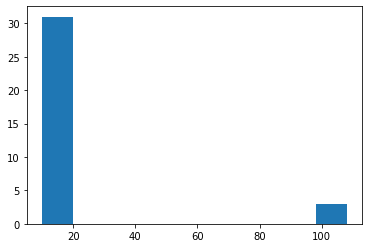

In [13]:
plt.hist(dataset)

In [27]:
## Z Score - Finding Outliers in Dataset
outliers = []

def detect_outliers(data):
    threshold = 3 ## Beyond 3rd Standard Deviation
    mean = np.mean(data) # Mean of Dataset
    std = np.std(data) # Standard Deviation of Dataset

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

In [28]:
detect_outliers(dataset)

[102, 107, 108]

### IQR - Inter-Quartile Range
1. Sort the Data
2. Calculate Q1 and Q3
3. IQR = (Q3-Q1)
4. Find Lower Fence (Q1 - 1.5(IQR))
5. Find Upper Fence (Q3 + 1.5(IQR))

In [18]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [33]:
q1, q3 = np.percentile(dataset, [25, 75])
print(q1, q3)

12.0 15.0


In [34]:
iqr = q3 - q1
iqr

3.0

In [35]:
# Find the Lower and Upper Fence
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr
print(lower_fence, upper_fence)

7.5 19.5


In [36]:
print("Outliers Lie above ", upper_fence)

Outliers Lie above  19.5


In [37]:
# Removing the Outliers
dataset2 = []

for i in dataset:
    if i < upper_fence:
        dataset2.append(i)

dataset2

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]

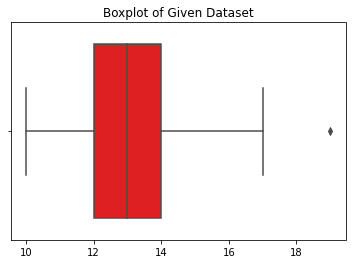

In [53]:
sns.boxplot(x=dataset2,color="r")

plt.title("Boxplot of Given Dataset")

plt.show()